In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import csv
%matplotlib inline
LENGTH = 29118021

In [3]:
def normalize_time(df):
    df["hour"] = (df["time"]%(60*24))/60.
    df["dayofweek"] = np.ceil((df["time"]%(60*24*7))/(60.*24))
    df["dayofyear"] = np.ceil((df["time"]%(60*24*365))/(60.*24))
    df.drop("time", axis=1, inplace=True)

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
print('\nSize of training data: ' + str(df_train.shape))
print('Columns:' + str(df_train.columns.values))
print('Number of places: ' + str(len(list(set(df_train['place_id'].values.tolist())))))
normalize_time(df_train)
df_train['place_id'] = df_train['place_id'].astype(str)



Size of training data: (29118021, 6)
Columns:['row_id' 'x' 'y' 'accuracy' 'time' 'place_id']
Number of places: 108390


In [6]:
df_train.head()

,row_id,x,y,accuracy,place_id,hour,dayofweek,dayofyear
0,0,0.7941,9.0809,54,8523065625,21.033333,5.0,327.0
1,1,5.9567,4.7968,13,1757726713,13.250000,4.0,130.0
2,2,8.3078,7.0407,74,1137537235,1.466667,1.0,225.0
3,3,7.3665,2.5165,65,6567393236,7.116667,7.0,125.0
4,4,4.0961,1.1307,31,7440663949,20.833333,6.0,328.0


In [7]:
normalize_time(df_test)
df_test.head()

,row_id,x,y,accuracy,hour,dayofweek,dayofyear
0,0,0.1675,1.3608,107,10.716667,3.0,282.0
1,1,7.3909,2.5301,35,3.616667,5.0,256.0
2,2,8.0978,2.3473,62,10.216667,7.0,314.0
3,3,0.9990,1.0591,62,1.416667,1.0,266.0
4,4,0.6670,9.7254,40,23.983333,5.0,270.0


In [8]:
"""
Prepare mini cells based on an 1x1 area (1% of data)
"""
mini_df_train = df_train

''

In [ ]:
def prepare_data(df, n_cell_x, n_cell_y):

In [7]:
validation_set = df_train[0:LENGTH//10]
training_set = df_train[LENGTH//10:]
print('\nSize of validation data: ' + str(validation_set.shape))
print('Columns:' + str(validation_set.columns.values))
print('Number of places: ' + str(len(list(set(validation_set['place_id'].values.tolist())))))
print('\nSize of training data: ' + str(training_set.shape))
print('Columns:' + str(training_set.columns.values))
print('Number of places: ' + str(len(list(set(training_set['place_id'].values.tolist())))))


Size of validation data: (2911802, 8)
Columns:['row_id' 'x' 'y' 'accuracy' 'place_id' 'hour' 'dayofweek' 'dayofyear']
Number of places: 107278

Size of training data: (26206219, 8)
Columns:['row_id' 'x' 'y' 'accuracy' 'place_id' 'hour' 'dayofweek' 'dayofyear']
Number of places: 108367


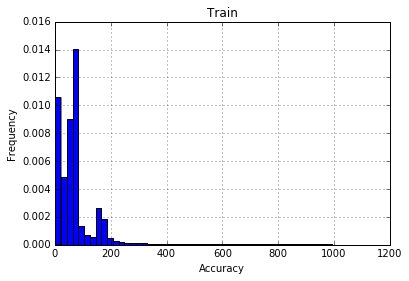

In [8]:
accuracy = df_train['accuracy']
n, bins, patches = plt.hist(accuracy, bins=50, normed=True)
plt.grid(True)
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Train")
figure = plt.figure(0, figsize=(12,3))

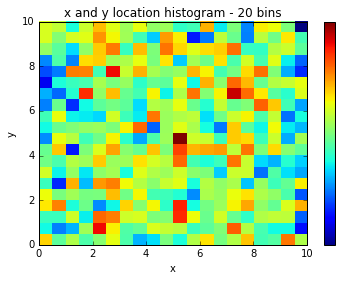

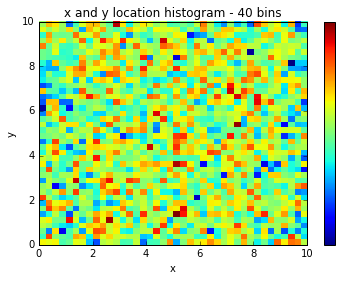

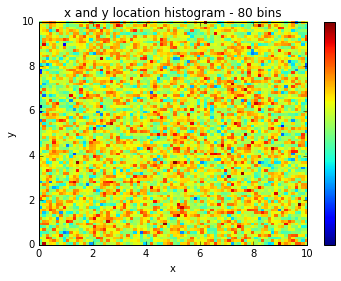

In [11]:
from matplotlib.colors import LogNorm
bins = 20
x = df_train['x']
y = df_train['y']
while bins <= 80:
    plt.hist2d(x, y, bins=bins, norm=LogNorm())
    plt.colorbar()
    plt.title("x and y location histogram - " + str(bins) + " bins")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    bins = bins * 2
    

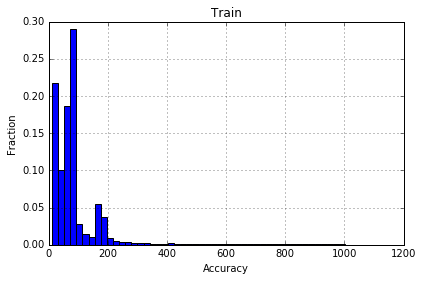

In [9]:
counts1, bins1 = np.histogram(df_train["accuracy"], bins=50)
binsc1 = bins1[:-1] + np.diff(bins1)/2.

plt.figure(0, figsize=(14,4))

plt.subplot(121)
plt.bar(binsc1, counts1/(counts1.sum()*1.0), width=np.diff(bins1)[0])
plt.grid(True)
plt.xlabel("Accuracy")
plt.ylabel("Fraction")
plt.title("Train")
plt.show()

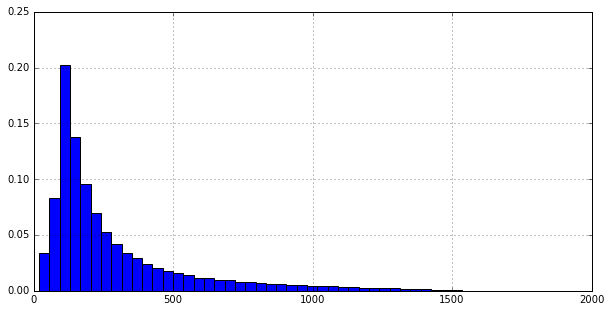

In [10]:
df_placecounts = df_train["place_id"].value_counts()

counts, bins = np.histogram(df_placecounts.values, bins = 50)
binsc = bins[:-1] + np.diff(bins) / 2.0

plt.figure(3, figsize=(10, 5))
plt.bar(binsc, counts/(counts.sum()*1.0), width=np.diff(bins)[0])
plt.grid(True)

(100, 100)


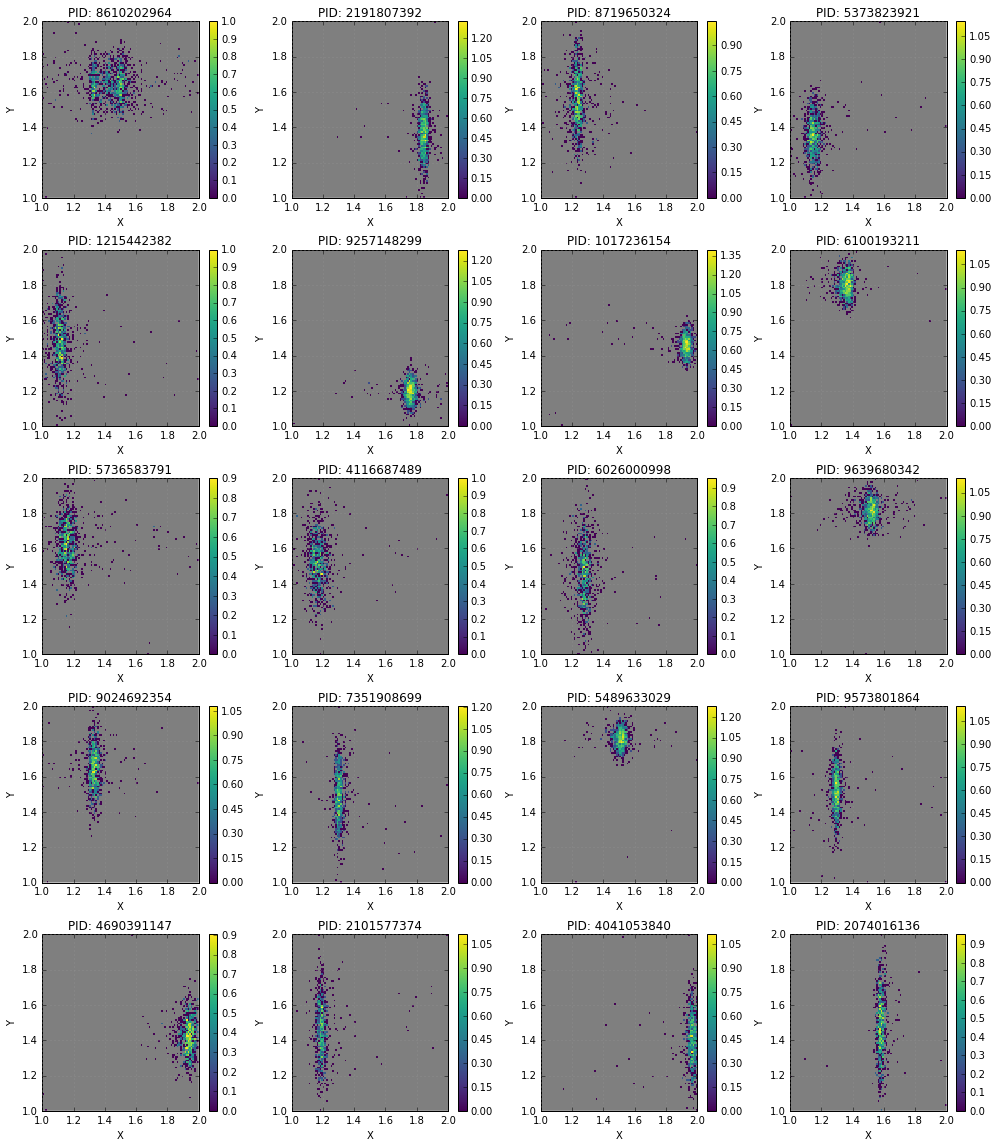

In [89]:
mini_dfv = validation_set.query('x > 1 & x < 2 & y > 1 & y < 2')
mini_dft = training_set.query('x > 1 & x < 2 & y > 1 & y < 2')
mini_placecounts = mini_dft['place_id'].value_counts() # Sorted array of place_counts
mini_topplaces = mini_placecounts.iloc[0:20]
l_topplaces = list(mini_topplaces.index)
# Check the 2d distribution of (x,y) for the top 20 places in this mini area.

plt.figure(10, figsize=(14,16))
cmapm = plt.cm.viridis
cmapm.set_bad("0.5", 1.)

for i in range(len(l_topplaces)):
    place = l_topplaces[i]
    df_place = mini_dft[mini_dft["place_id"] == place]
    counts, binsX, binsY = np.histogram2d(df_place["x"], df_place["y"], bins=100)
    extent = [1, 2, 1, 2]
    plt.subplot(5, 4, i+1)
    sc = plt.imshow(X = np.log10(counts.T), interpolation='none', origin='lower',extent=extent, aspect="auto", cmap=cmapm)
    plt.colorbar(sc)
    plt.grid(True, c='0.6', lw=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('PID: ' + place)

print(counts.T.shape)
plt.tight_layout()
plt.show()

In [90]:
mini_dft.head()

,row_id,x,y,accuracy,place_id,hour,dayofweek,dayofyear
2911845,2911845,1.8397,1.8377,6,9838617334,12.133333,6.0,131.0
2912023,2912023,1.0912,1.0203,104,8517315303,16.983333,4.0,80.0
2912073,2912073,1.2017,1.1613,19,1017236154,2.966667,3.0,129.0
2912134,2912134,1.4896,1.7497,246,8379047808,22.333333,1.0,281.0
2912223,2912223,1.1378,1.8928,41,9224390847,9.466667,1.0,70.0


In [91]:
"""
Naive KNN:
"""

def validate(predicted, expected):
    from sklearn import metrics
    s = metrics.accuracy_score(expected, predicted)
    m = metrics.confusion_matrix(expected, predicted)
    print(s)
    return s
from sklearn import neighbors
K = 18
X = mini_dft.drop(['place_id', 'row_id', 'accuracy', 'hour', 'dayofyear'], axis=1, inplace=False)
y = mini_dft['place_id']
accuracy = mini_dft['accuracy']
clf = neighbors.KNeighborsClassifier(K)
clf.fit(X, y)
Xv = mini_dfv.drop(['place_id', 'row_id', 'accuracy', 'hour', 'dayofyear'], axis=1, inplace=False)
predicted = clf.predict(Xv)
expected = mini_dfv['place_id']
validate(predicted, expected)

0.43802416489


0.43802416488983653

In [178]:
with open('submission.csv', 'a') as csvfile:
    mini_test = df_test[(df_test.y == 0) | (df_test.x == 0)]
    T = mini_test.drop(['row_id', 'accuracy', 'hour', 'dayofyear'], axis=1, inplace = False)
    T_row = mini_test['row_id']
    distances, indices = nbrs.kneighbors(T)
    for i, lst in enumerate(indices):
        writer = csv.writer(csvfile, delimiter=' ')
        label_count = y.iloc[lst].value_counts()
        top_three = label_count[:3]
        lst = list(top_three.keys())
        csvfile.write(str(T_row.iloc[i]) + ",")
        writer.writerow(lst)
            

In [1]:
"""
Run KNN on 100 mini dataset.
"""

s = pd.Series()
for x in range(100):
    for y in range(100):
        with open('submission.csv', 'a') as csvfile:
            writer = csv.writer(csvfile, delimiter=' ')
            print(x, y)
            mini_t = df_train[(df_train.x > x) & (df_train.x <= x+1) & (df_train.y > y) & (df_train.y <= y+1)]
            mini_test = df_test[(df_test.x > x) & (df_test.x <= x+1) & (df_test.y > y) & (df_test.y <= y+1)]
            X = mini_t.drop(['place_id', 'row_id', 'accuracy', 'hour', 'dayofyear'], axis=1, inplace = False)
            y = mini_t['place_id']
            T = mini_test.drop(['row_id', 'accuracy', 'hour', 'dayofyear'], axis=1, inplace = False)
            T_row = mini_test['row_id']
            nbrs = neighbors.NearestNeighbors(n_neighbors=100, algorithm='ball_tree').fit(X)
            distances, indices = nbrs.kneighbors(T)
            for i, lst in enumerate(indices):
                label_count = y.iloc[lst].value_counts()
                top_three = label_count[:3]
                lst = list(top_three.keys())
                csvfile.write(str(T_row.iloc[i]) + ",")
                writer.writerow(lst)
            

In [131]:
from collections import Counter
import csv
with open('submission.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=' ')
    nbrs = neighbors.NearestNeighbors(n_neighbors=75, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(Xv)
    for lst in indices:
        label_count = y.iloc[lst].value_counts()
        top_three = label_count[:3]
        lst = list(top_three.keys())
        csvfile.write("1,")
        writer.writerow(lst)
    

In [129]:
print(X.iloc[9736])
print(Xv.iloc[0])
label_count = y.iloc[indices[0]].value_counts()
top_three = label_count[:3]
print(list(top_three.keys()))

x            1.2197
y            1.3426
dayofweek    3.0000
Name: 3934878, dtype: float64
x            1.2191
y            1.3462
dayofweek    3.0000
Name: 39, dtype: float64
['4088734818', '2777505432', '8074414179']


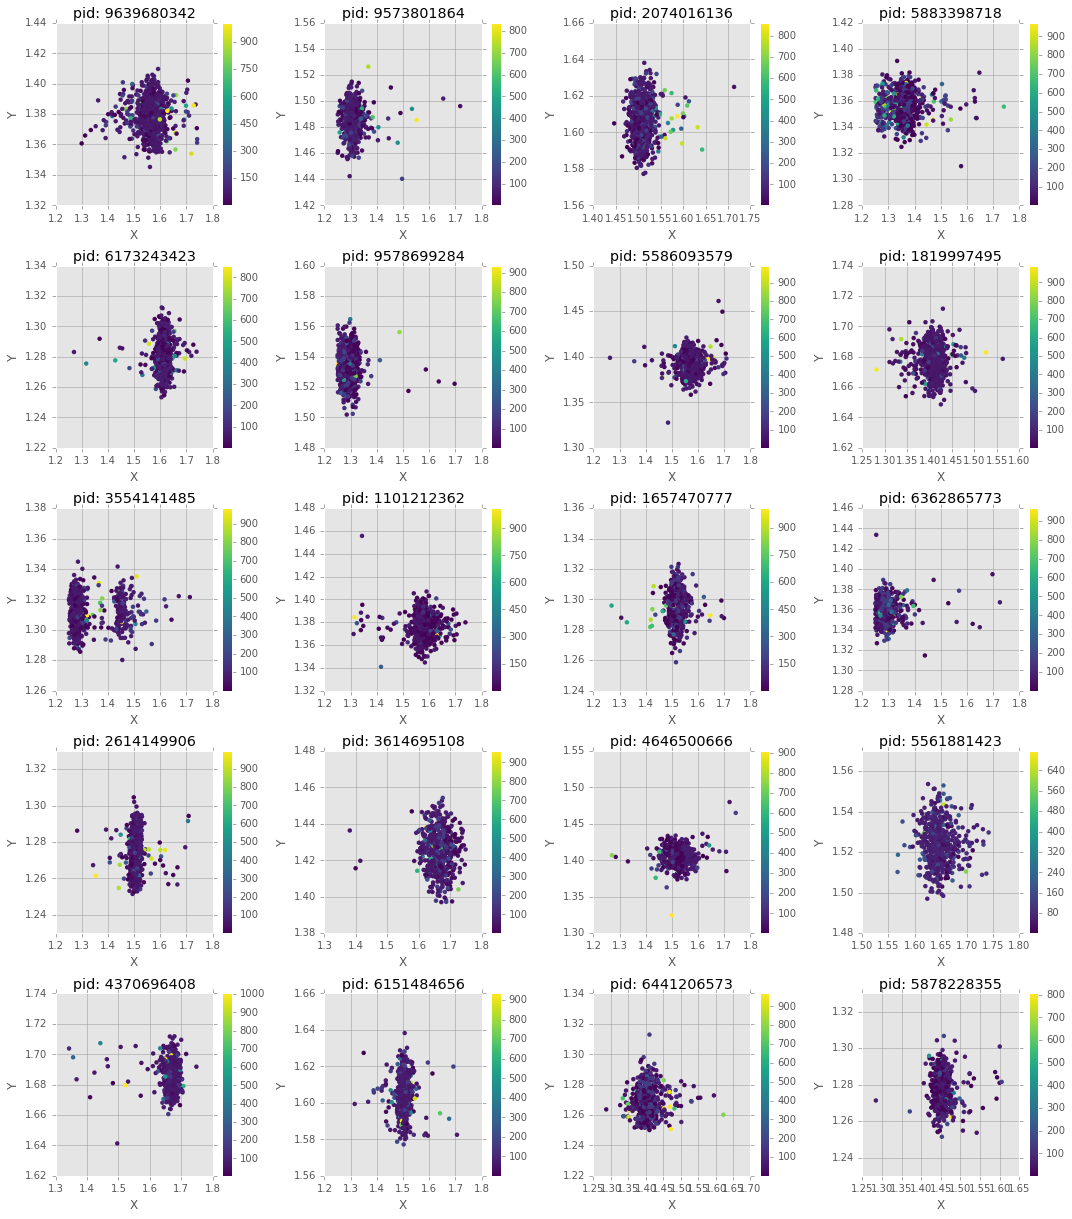

In [77]:
# See if the accuracy varies with distance from centroid point
plt.figure(11, figsize=(15, 17))
for i in range(len(l_topplaces)):
    plt.subplot(5, 4, i+1)
    place = l_topplaces[i]
    df_place = mini_dft[mini_dft["place_id"] == place]
    sc = plt.scatter(df_place["x"], df_place["y"], s=20, c=df_place["accuracy"], lw=0, cmap=plt.cm.viridis)
    plt.colorbar(sc)
    plt.grid(True, c='0.6', lw=0.5)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("pid: " + place)
    
plt.tight_layout()
plt.show()